In [126]:
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import joblib

In [122]:
def load_and_prepare_data(seed_dir, seeds_train,
                         is_filename=False):
    train_df = []
    for i in seeds_train:
        if is_filename:
            seed_df = pd.read_csv(i)
        else:
            seed_df = pd.read_csv(seed_dir+f'seir_seed_{i}.csv')
            
        seed_df['prev_I'] = seed_df['I'].shift(1).fillna(0)
        seed_df['day'] = np.arange(len(seed_df))
        seed_df = seed_df[(seed_df['E'] > 0)|(seed_df['I'] > 0)].copy()
        #seed_df = seed_df[seed_df['Beta'] > 0].copy()
        
        train_df.append(seed_df)
        
    
    train_df = pd.concat(train_df, ignore_index=True)
    train_df = train_df[train_df['Beta'] > 0].copy()
    
    pop = train_df.iloc[0,:4].sum()
    train_df.iloc[:,:4] = train_df.iloc[:,:4]/pop
    train_df.loc[:,'prev_I'] = train_df.loc[:,'prev_I']/pop
    #train_df.loc[:,'Beta'] = train_df.loc[:,'Beta'].replace(0, 1e-7)
    #train_df.loc[:,'Beta'] = train_df.loc[:,'Beta'].fillna(1e-7)
    train_df['log_Beta'] = np.log(train_df['Beta'])
    return train_df


def train_model(train_df, model_file,features):
    X = train_df[features].values
    y = train_df['log_Beta'].values

    model = make_pipeline(
        StandardScaler(),
        PolynomialFeatures(include_bias=False, degree=3),
        SGDRegressor(alpha=0.0001, max_iter=1000, 
                     penalty='l2', warm_start=False)
    )
    model.fit(X, y)
    print(model.score(X, y))
    # Сохраняем лучшую модель
    joblib.dump(model, model_file)

    
def plot(model_file, features):
    model = joblib.load(model_file)
    X = train_df[features].values
    y = train_df['log_Beta'].values
    pred = model.predict(X)
    
    print('MSE: ', mean_squared_error(y, pred))
    fig = plt.figure(figsize=(5, 3)) 
    plt.plot(y, ls='', marker='.')
    plt.plot(pred, ls='', marker='.')
    plt.grid()


In [129]:
# мб нормальную модель авторегрессии?
df_seeds = pd.read_csv('initial_data/seeds_set_parameters.csv')
seeds_train = df_seeds[df_seeds.set!='test']['seed_number'].values
features = ['day', 
            #'prev_I', 
            'S', 
            'E', 
            'I', 
            #'R'
           ]

## barabasi-albert

0.7038306763193451
MSE:  0.14117118980851645


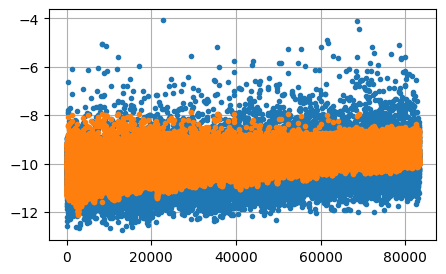

In [142]:
seed_dir='initial_data/initial_data_ba_10000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'


train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

In [143]:
train_df

,S,E,I,R,Beta,prev_I,day,log_Beta
0,0.9950,0.0000,0.0050,0.0000,0.000070,0.0000,0,-9.562003
1,0.9915,0.0035,0.0046,0.0004,0.000053,0.0050,1,-9.852392
2,0.9891,0.0054,0.0046,0.0009,0.000051,0.0046,2,-9.892528
3,0.9868,0.0072,0.0045,0.0015,0.000081,0.0046,3,-9.420196
4,0.9832,0.0100,0.0049,0.0019,0.000071,0.0045,4,-9.558857
...,...,...,...,...,...,...,...,...
193320,0.0010,0.0368,0.1587,0.8035,0.000063,0.1691,48,-9.672186
193322,0.0009,0.0313,0.1379,0.8299,0.000081,0.1476,50,-9.426338
193324,0.0008,0.0270,0.1205,0.8517,0.000207,0.1279,52,-8.480529
193327,0.0006,0.0185,0.1013,0.8796,0.000165,0.1071,55,-8.712431


In [39]:
seed_dir='initial_data/initial_data_ba_50000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

FileNotFoundError: [Errno 2] No such file or directory: 'initial_data/initial_data_ba_50000/seir_seed_0.csv'

0.7742044013608336


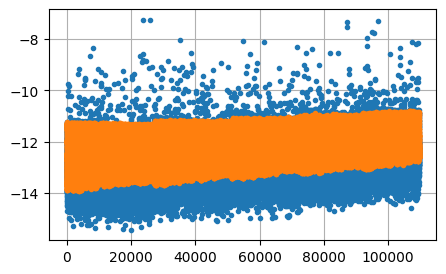

In [71]:
seed_dir='initial_data/initial_data_ba_100000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

### new

In [144]:
df_seeds_n = pd.read_csv('initial_data/new_seeds_parameters.csv')
seeds_train_n = df_seeds_n[df_seeds_n.set!='test']['file'].values


seed_dir='initial_data/ba_10000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train_n,
                                is_filename=True)

In [146]:
train_df

,S,E,I,R,Beta,prev_I,day,log_Beta
0,0.9450,0.0000,0.0050,0.0500,0.001501,0.0000,0,-6.501937
1,0.8741,0.0676,0.0078,0.0505,0.000791,0.0050,1,-7.142773
2,0.8202,0.1137,0.0144,0.0517,0.000384,0.0078,2,-7.863849
3,0.7748,0.1457,0.0256,0.0539,0.000232,0.0144,3,-8.369141
4,0.7288,0.1761,0.0379,0.0572,0.000168,0.0256,4,-8.689483
...,...,...,...,...,...,...,...,...
171836,0.0127,0.0055,0.0236,0.9582,0.000033,0.0250,59,-10.308019
171840,0.0126,0.0041,0.0178,0.9655,0.000045,0.0183,63,-10.018065
171844,0.0125,0.0021,0.0132,0.9722,0.000061,0.0147,67,-9.711116
171846,0.0124,0.0019,0.0104,0.9753,0.000233,0.0120,69,-8.366060


-6254938483421349.0
MSE:  7541230622848806.0


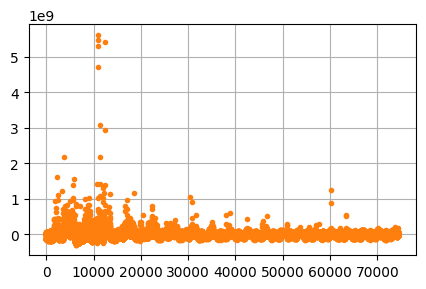

In [145]:
train_model(train_df, model_file, features)
plot(model_file, features)

## small world

0.7831986579904753


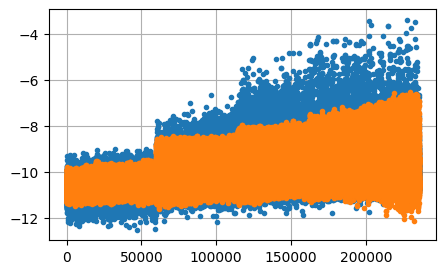

In [73]:
seed_dir='initial_data/initial_data_sw_10000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

0.7995411630648883


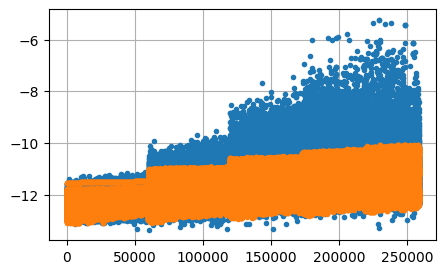

In [84]:
seed_dir='initial_data/initial_data_sw_50000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

0.8006524916040959


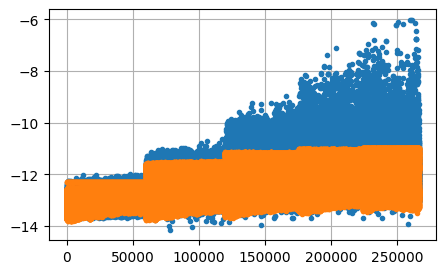

In [86]:
seed_dir='initial_data/initial_data_sw_100000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

## random

0.47265593949212037


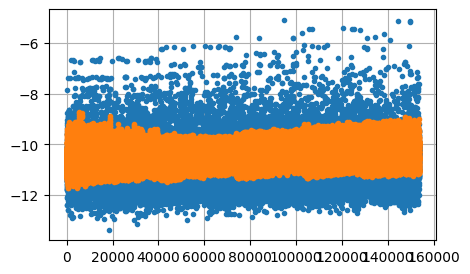

In [76]:
seed_dir='initial_data/initial_data_r_10000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

0.39236605160335125


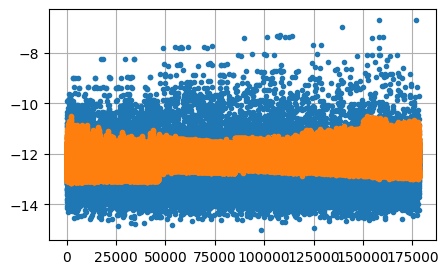

In [77]:
seed_dir='initial_data/initial_data_r_50000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)

0.506706635398467


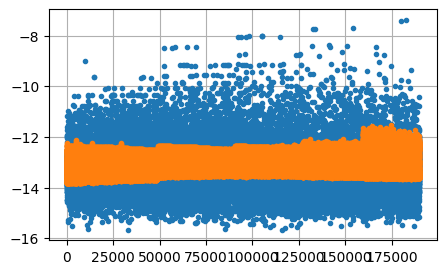

In [79]:
seed_dir='initial_data/initial_data_r_100000/'
model_file = seed_dir+'regression_day_SEIR_prev_I_for_seir.joblib'

train_df = load_and_prepare_data(seed_dir, seeds_train)
train_model(train_df, model_file, features)
plot(model_file, features)